In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

## Overview & General Visualisation - Transactions

In [40]:
transactions_df = pd.read_csv('la_liga_filtered_cards_transactions.csv', dtype={20: str})

In [42]:
transactions_df.head()

,present_team_name,card_id,asset_id,card_name,season_year,card_slug,rarity,card_creation_date,grade,power,...,2022_23_la_liga,2023_24_la_liga,2021_22_uefa,2022_23_uefa,2023_24_uefa,price_eth,transaction_category,transaction_market,in_season_card_transaction,user_category
0,Montpellier Hérault SC,Card:45f3b5ea-24cf-48a3-9334-e39da29a916c,0x0400435b5e77d484c9455216d0f67b29f3eb1c45fc2a...,Benjamin Lecomte 2021-22 • Limited 1/1000,2021,benjamin-lecomte-2021-limited-1,limited,2021-08-19 03:21:16+00:00,18,1.100,...,True,True,True,True,True,0.057,monetary_transaction,Primary,True,manager
1,Montpellier Hérault SC,Card:e9d87944-0792-4c51-a638-82e64fb4283c,0x040069d2c0389b7dcfe3f7bbd28972f021f2768d8f14...,Benjamin Lecomte 2021-22 • Limited 2/1000,2021,benjamin-lecomte-2021-limited-2,limited,2021-08-19 03:21:17+00:00,19,1.105,...,True,True,True,True,True,0.048,monetary_transaction,Primary,True,manager
2,Montpellier Hérault SC,Card:404b9730-8172-41bf-b473-5b9509bb7b1e,0x0400a08ab396ace871c6b546c1fed90c9ebe856cc5a4...,Benjamin Lecomte 2021-22 • Limited 3/1000,2021,benjamin-lecomte-2021-limited-3,limited,2021-08-19 03:21:18+00:00,11,1.055,...,True,True,True,True,True,0.046,monetary_transaction,Primary,True,manager
3,Montpellier Hérault SC,Card:a8a67077-efbd-4cbf-97c9-0fcdd8e530ba,0x0400b17048f1f73d9de08f66e35367132228ff89dfff...,Benjamin Lecomte 2021-22 • Limited 4/1000,2021,benjamin-lecomte-2021-limited-4,limited,2021-08-19 03:21:19+00:00,14,1.080,...,True,True,True,True,True,0.043,monetary_transaction,Primary,True,manager
4,Montpellier Hérault SC,Card:47bf6905-dc3b-4420-bac8-1401fe0fd953,0x0400a5ad0f23b46facd57b6bfad6ca9010e0c0fba2ec...,Benjamin Lecomte 2021-22 • Limited 5/1000,2021,benjamin-lecomte-2021-limited-5,limited,2021-08-19 03:21:20+00:00,13,1.075,...,True,True,True,True,True,0.037,monetary_transaction,Primary,True,manager


In [43]:
list(set(transactions_df.dtypes.tolist()))

[dtype('bool'), dtype('int64'), dtype('O'), dtype('float64')]

In [44]:
#Removing "legends cards" 
transactions_df = transactions_df[transactions_df['season_year'] > 2020]

In [45]:
transactions_df['transaction_category'].value_counts()

transaction_category
monetary_transaction    928208
trade                   193761
free_transaction        121018
other                     3080
Name: count, dtype: int64

In [46]:
# Filtering on Monetary to analyse the price evolution.
monetary_transactions_df = transactions_df[transactions_df['transaction_category'] == 'monetary_transaction']
monetary_transactions_df.shape

(928208, 49)

In [47]:
transactions_df['transaction_date'].dtypes

dtype('O')

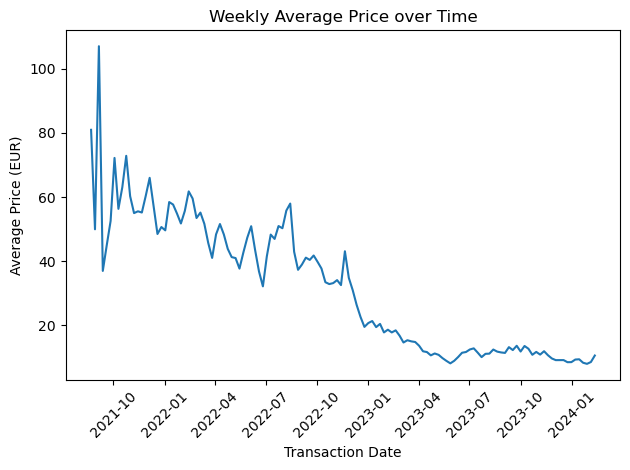

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'transaction_date' column to datetime data type
monetary_transactions_df.loc[:, 'transaction_date'] = pd.to_datetime(monetary_transactions_df['transaction_date'])

# Set 'transaction_date' as the index
monetary_transactions_df.set_index('transaction_date', inplace=True)

# Resample data to get the weekly average price
weekly_avg_price = monetary_transactions_df['price_eur'].resample('W').mean()

# Create a line plot of the weekly average price over time
plt.plot(weekly_avg_price.index, weekly_avg_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Average Price (EUR)')
plt.title('Weekly Average Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

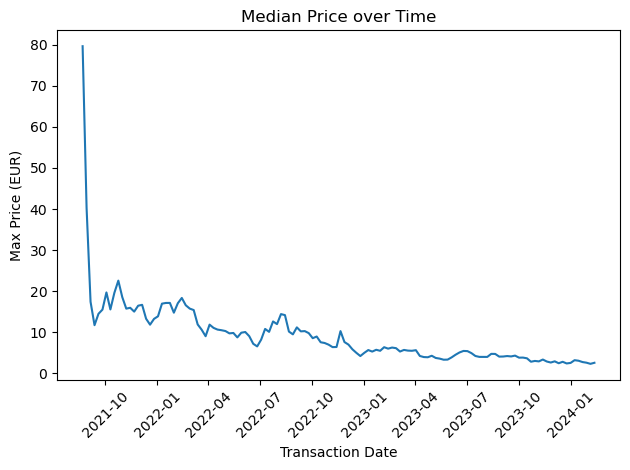

In [53]:
# Resample data to get the weekly average price
weekly_median_price = monetary_transactions_df['price_eur'].resample('W').median()

# Create a line plot of the weekly average price over time
plt.plot(weekly_median_price.index, weekly_median_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Max Price (EUR)')
plt.title('Median Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

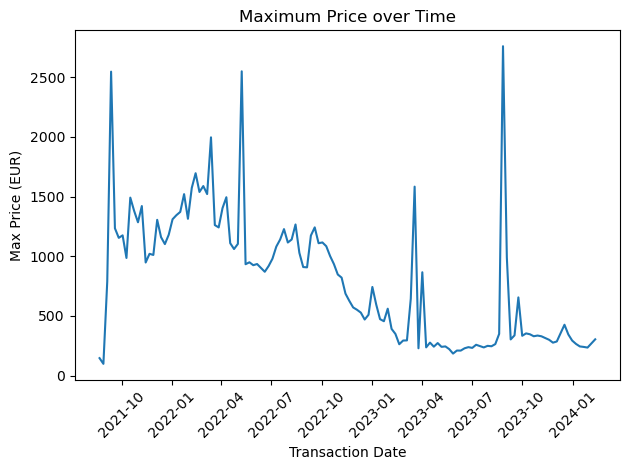

In [52]:

# Resample data to get the weekly average price
weekly_max_price = monetary_transactions_df['price_eur'].resample('W').max()

# Create a line plot of the weekly average price over time
plt.plot(weekly_max_price.index, weekly_max_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Max Price (EUR)')
plt.title('Maximum Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

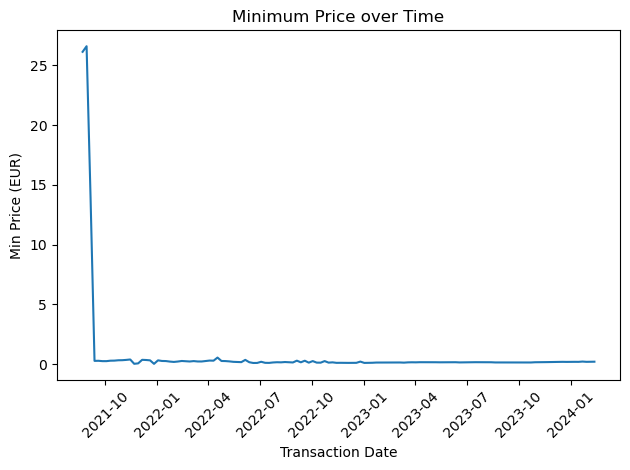

In [55]:

# Resample data to get the weekly average price
weekly_min_price = monetary_transactions_df['price_eur'].resample('W').min()

# Create a line plot of the weekly average price over time
plt.plot(weekly_min_price.index, weekly_min_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Min Price (EUR)')
plt.title('Minimum Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
eth_price = pd.read_csv('ETH-EUR.csv')

In [57]:
eth_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2904.953369,3240.188477,2869.870117,3238.466309,3238.466309,25394505842
1,2021-09-02,3230.189941,3226.133057,3145.891602,3192.718750,3192.718750,20538724608
2,2021-09-03,3189.768066,3383.274902,3125.017090,3317.280518,3317.280518,22062168396
3,2021-09-04,3315.003662,3341.553467,3229.630615,3271.619385,3271.619385,17509122062
4,2021-09-05,3270.359131,3348.947021,3230.098633,3325.186768,3325.186768,15457110659


In [73]:
import pandas as pd

# Filter 'eth_price' DataFrame for the desired dates
start_date = '2021-09-01'
end_date = '2021-09-30'
eth_price_subset = eth_price[(eth_price['Date'] >= start_date) & (eth_price['Date'] <= end_date)].copy()

# Convert 'Date' column to datetime (timezone-naive)
eth_price_subset['Date'] = pd.to_datetime(eth_price_subset['Date'])

# Find the closest date to the start date
closest_date = eth_price_subset.loc[
    (eth_price_subset['Date'] - pd.to_datetime(start_date)).abs().argsort()
].iloc[0]['Date']

# Calculate the relative prices (normalized to base 100)
closest_price = eth_price_subset.loc[eth_price_subset['Date'] == closest_date, 'Close'].values[0]
eth_price_subset['Relative ETH Price'] = eth_price_subset['Close'] / closest_price * 100

# Create a boolean mask based on the date range
mask = (weekly_avg_price.index >= pd.to_datetime(start_date)) & (weekly_avg_price.index <= pd.to_datetime(end_date))

# Calculate relative prices for the masked range
weekly_avg_price_relative = weekly_avg_price.loc[mask] / weekly_avg_price.loc[mask[0]] * 100

# Create a DataFrame to store the relative prices
relative_prices = pd.DataFrame({
    'Date': eth_price_subset['Date'],
    'Relative ETH Price': eth_price_subset['Relative ETH Price'],
    'Relative Average Transaction Price': weekly_avg_price_relative.values
})

# Display the DataFrame
print(relative_prices)

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp